In [351]:
import numpy as np
import pandas as pd
 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
 
import statsmodels.api as sm
import statsmodels.formula.api as smf
 
import sklearn.linear_model as skl_lm
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics



In [352]:
df = pd.read_csv("https://raw.githubusercontent.com/PareshC95/Breast_cancer_classification/refs/heads/main/data.csv")
##df = clean_dataframe(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [353]:
df["diagnosis_enc"] = df["diagnosis"].map({'B': 0, 'M': 1})
df["diagnosis_enc"].value_counts()

diagnosis_enc
0    357
1    212
Name: count, dtype: int64

In [354]:
# Separate the target variable 'diagnosis' and the features
y = df['diagnosis_enc']
X = df.drop(columns=['diagnosis','id','Unnamed: 32'])

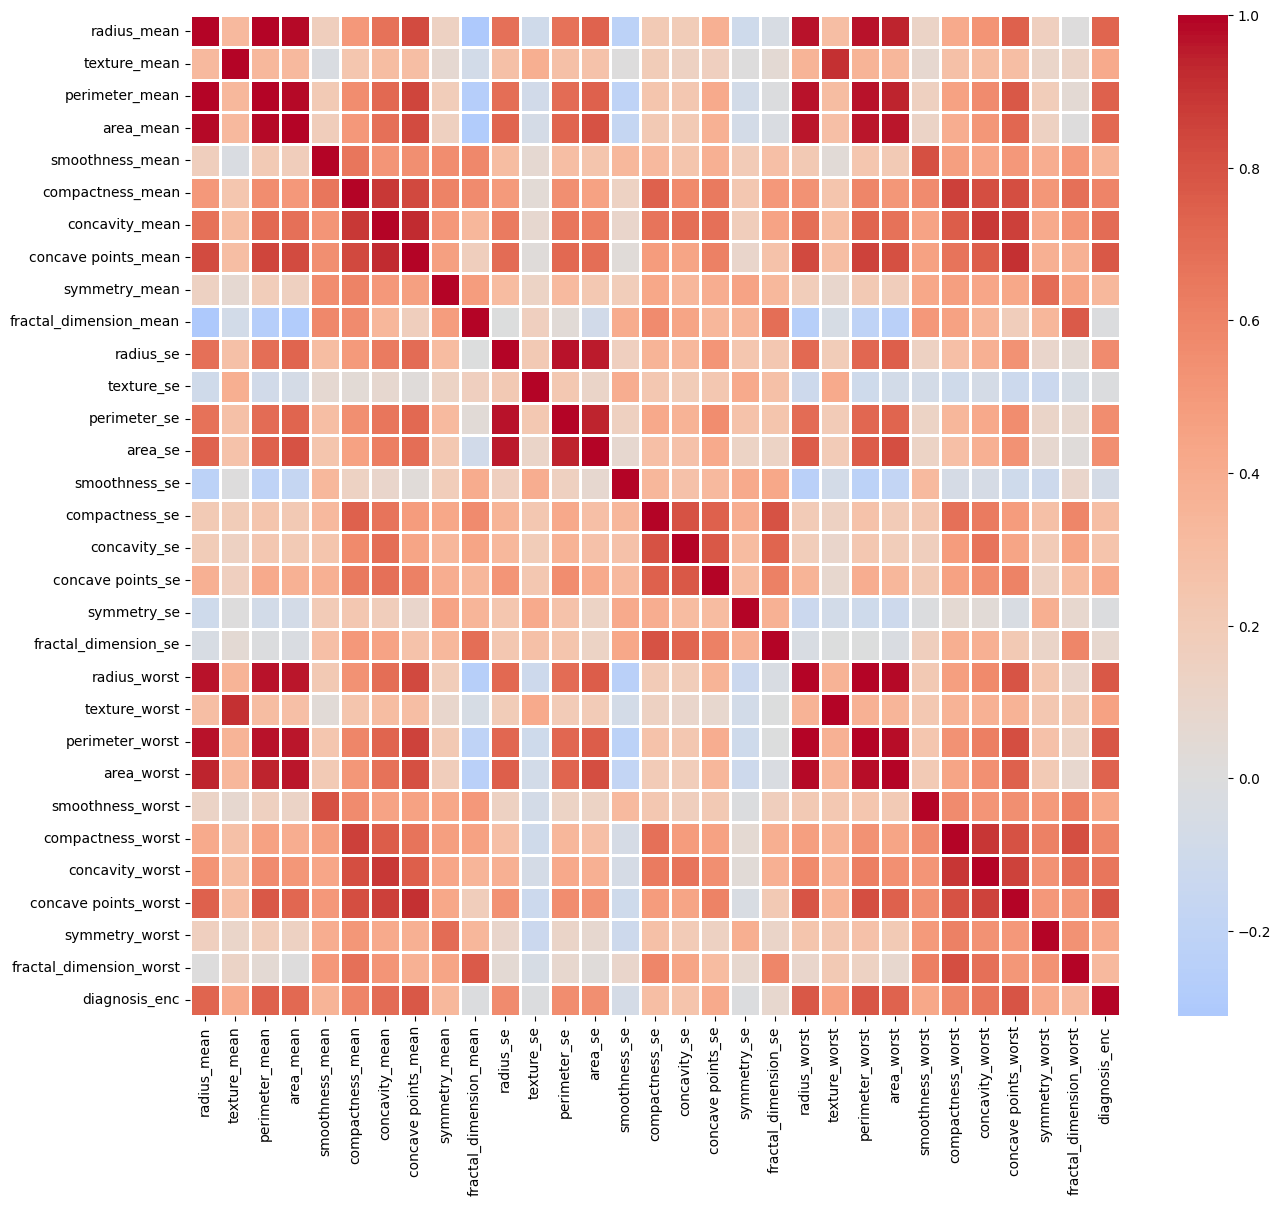

In [355]:
corr = X.corr()

plt.figure(figsize=(15, 13))
sns.heatmap(corr,
            cmap='coolwarm',
            center=0,
            # annot=True,
            # fmt=".2f",
            linecolor='white',
            linewidths=1
            )
plt.show()

IndexError: index 30 is out of bounds for axis 0 with size 30

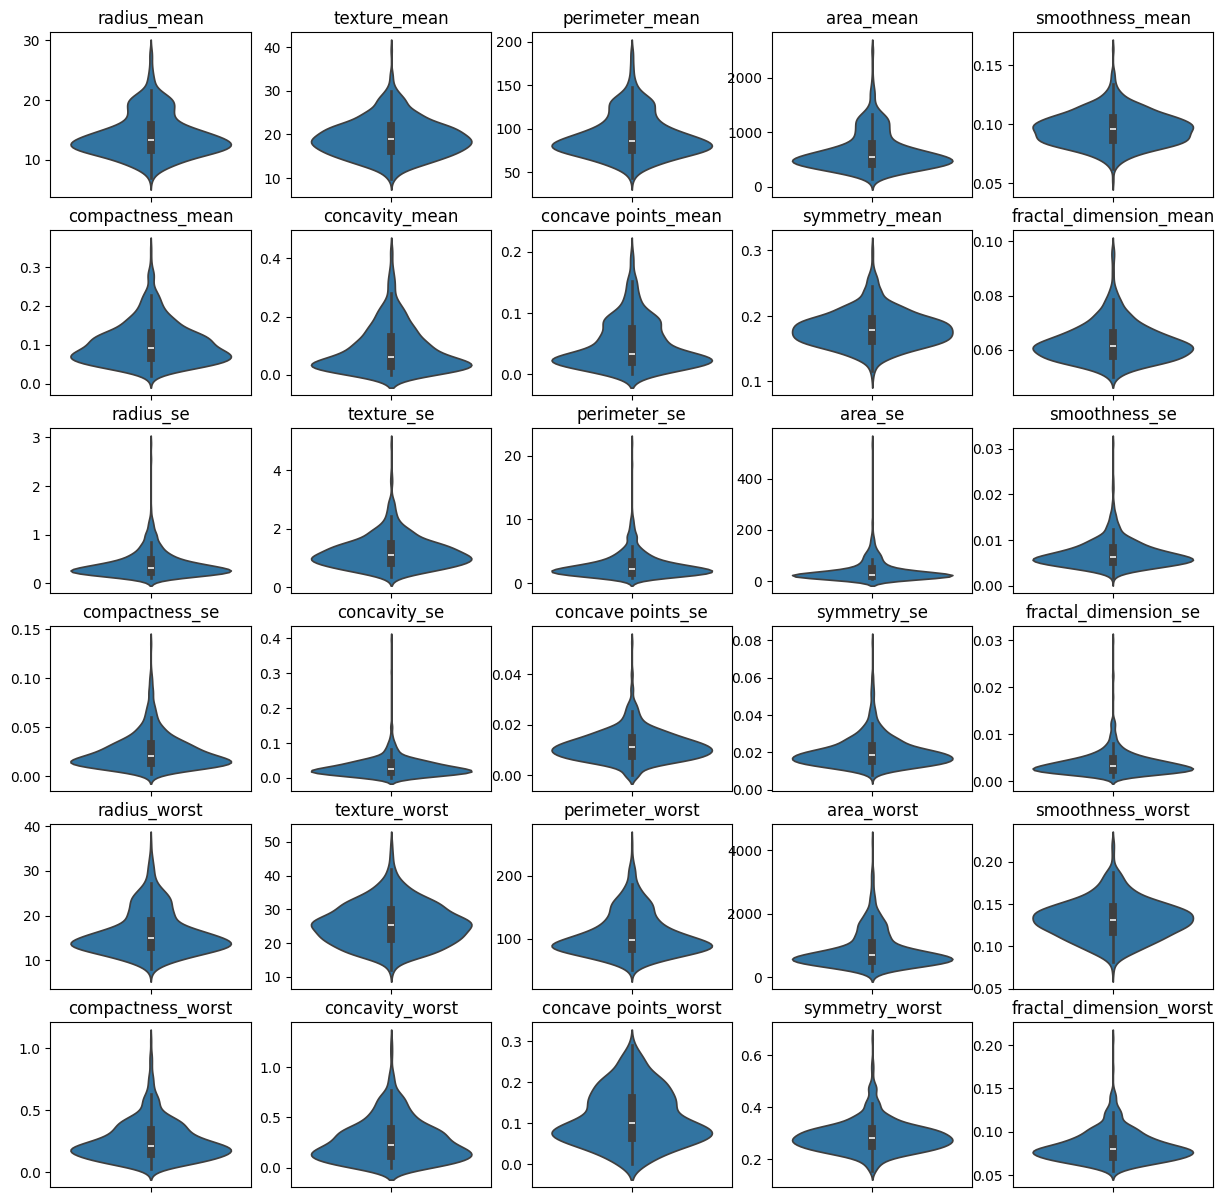

In [356]:
fig, axes = plt.subplots(6, 5, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(X.columns):
    sns.violinplot(y=X[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [357]:
X = X.drop(columns=["radius_mean", "perimeter_mean", "perimeter_mean", "perimeter_worst","area_worst","radius_se","perimeter_se"])

# Train test split

In [358]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression

In [359]:
# Fit the model

logistic = skl_lm.LogisticRegression()

logistic.fit(X_train, y_train)

c:\Users\pchaudhary.FFIND\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Outlier Detection

In [316]:
color_blue = "#1a559e"
color_black_vivid = "#0070c0"
color_blue_light = "dodgerblue"
color_pink = "#e71d71"
color_black = "black"
color_gold = "#FFD700"
color_orange = "orange"
color_red = "darkred"

In [317]:
col_to_analyze = "area_se"

In [318]:
q1, q2, q3 = np.percentile(X[col_to_analyze], [25, 50, 75])
bins = 80
data = X[col_to_analyze]
q1, q2, q3 = np.percentile(data, [25, 50, 75])

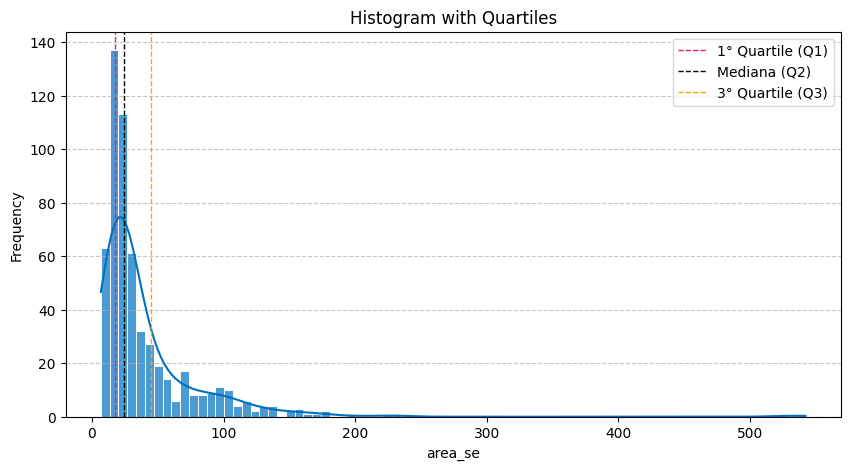

In [319]:
# Create the histogram with KDE
plt.figure(figsize=(10, 5))
sns.histplot(data, bins=bins, kde=True, color=color_black_vivid, edgecolor="white", alpha=0.7)

# Add lines for the quartiles
plt.axvline(q1, color=color_pink, linestyle="dashed", linewidth=1, label="1° Quartile (Q1)")
plt.axvline(q2, color=color_black, linestyle="dashed", linewidth=1, label="Mediana (Q2)")
plt.axvline(q3, color=color_orange, linestyle="dashed", linewidth=1, label="3° Quartile (Q3)")

# Add labels and title
plt.xlabel(col_to_analyze)
plt.ylabel("Frequency")
plt.title("Histogram with Quartiles")
plt.legend(loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

In [320]:
mean = X[col_to_analyze].mean()
std = X[col_to_analyze].std()
threshold = 2

computed_threshold = threshold * std
computed_threshold_right = mean + computed_threshold 
computed_threshold_left = mean - computed_threshold

standard_deviation_outliers = np.abs(X[col_to_analyze] - mean) > computed_threshold

print(f"Number of outliers: {standard_deviation_outliers.sum()}")
print(f"Percentage of outliers: {standard_deviation_outliers.mean() * 100:.2f}%")

Number of outliers: 19
Percentage of outliers: 3.34%


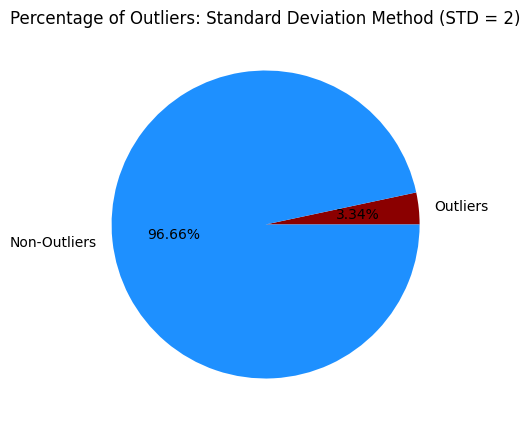

In [321]:
# plot a piechart for percentage exclusion
plt.figure(figsize=(5, 5))
plt.pie([standard_deviation_outliers.mean(), 1 - standard_deviation_outliers.mean()],
        labels=["Outliers", "Non-Outliers"],
        autopct='%1.2f%%',
        colors=[color_red, color_blue_light ])
plt.title(f"Percentage of Outliers: Standard Deviation Method (STD = {threshold})")
plt.show()

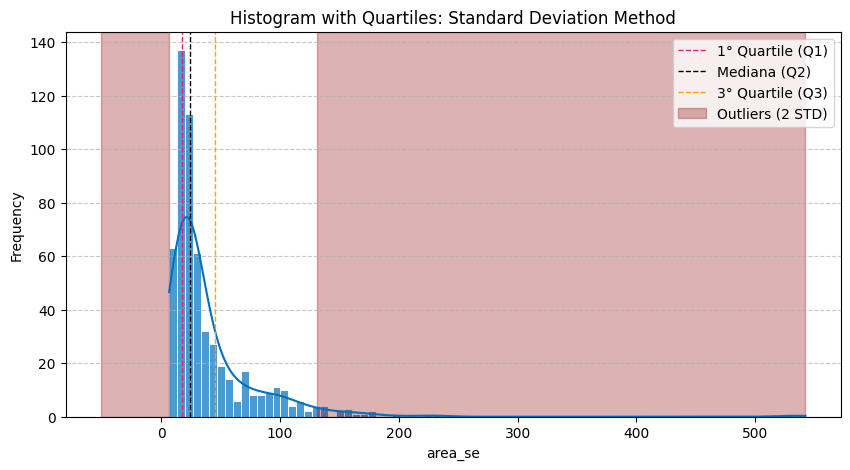

In [322]:
# Create the histogram with KDE
plt.figure(figsize=(10, 5))
sns.histplot(data, bins=bins, kde=True, color=color_black_vivid, edgecolor="white", alpha=0.7)

# Add lines for the quartiles
plt.axvline(q1, color=color_pink, linestyle="dashed", linewidth=1, label="1° Quartile (Q1)")
plt.axvline(q2, color=color_black, linestyle="dashed", linewidth=1, label="Mediana (Q2)")
plt.axvline(q3, color=color_orange, linestyle="dashed", linewidth=1, label="3° Quartile (Q3)")

# Color the area beyond the computed thresholds
outliers_label = f"Outliers ({threshold} STD)"
plt.axvspan(computed_threshold_right, data.max(), color=color_red, alpha=0.3, label=outliers_label)
plt.axvspan(data.min(), computed_threshold_left, color=color_red, alpha=0.3)

# Add labels and title
plt.xlabel(col_to_analyze)
plt.ylabel("Frequency")
plt.title("Histogram with Quartiles: Standard Deviation Method")
plt.legend(loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

## 2. Box Plot Method (IQR)

The **Box Plot Method** for outlier detection is based on the **Interquartile Range (IQR)**.
This method identifies outliers by calculating the range within which the central 50% of the data lies. Here's how it works:

1. **Calculate Quartiles**: Determine the **first quartile (Q1)** and **third quartile (Q3)** of the data.
2. **Compute IQR**: Calculate the **IQR** as the difference between Q3 and Q1 (**IQR = Q3 - Q1**).
3. **Determine Boundaries**: Define the **lower boundary** as **Q1 - 1.5 * IQR** and the **upper boundary** as **Q3 + 1.5 * IQR**.
4. **Identify Outliers**: Data points that fall **below the lower boundary** or **above the upper boundary** are considered **outliers**.

**When It's Convenient**:
- **Non-Normal Distributions**: Effective for data that is **not normally distributed**.
- **Skewed Data**: Useful for detecting outliers in **skewed datasets**.
- **Robustness**: Less affected by **extreme values** compared to methods based on mean and standard deviation.

This method is particularly useful when dealing with **asymmetric data** or when the data contains **extreme values** that could distort the results of other outlier detection methods.


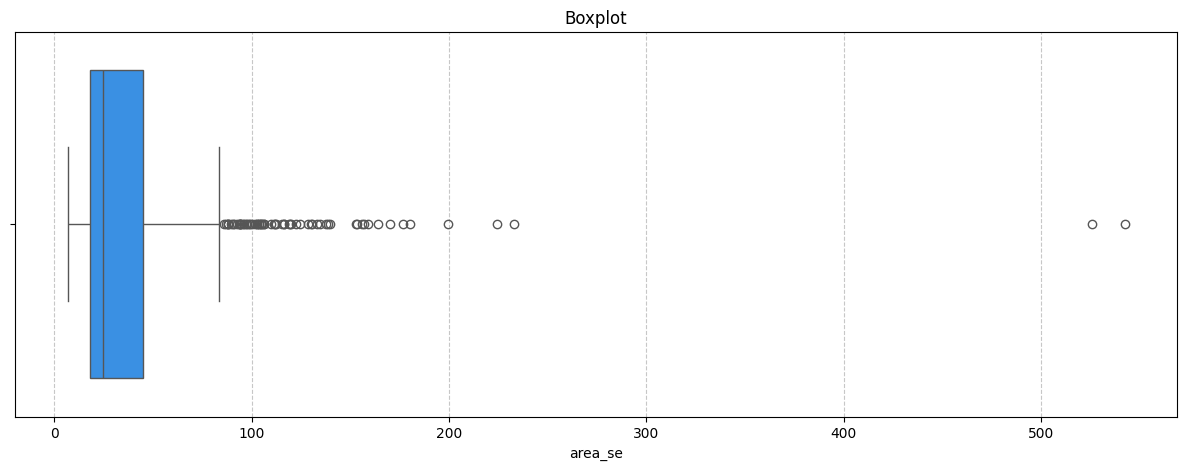

In [323]:
# Boxplot
plt.figure(figsize=(15, 5))
sns.boxplot(x=data, color=color_blue_light)
plt.title("Boxplot")
plt.xlabel(col_to_analyze)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

In [324]:
IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

box_plot_outliers = (data < lower_bound) | (data > upper_bound)

# Outliers
print(f"Number of outliers: {box_plot_outliers.sum()}")
print(f"Percentage of outliers: {box_plot_outliers.mean() * 100:.2f}%")

Number of outliers: 65
Percentage of outliers: 11.42%


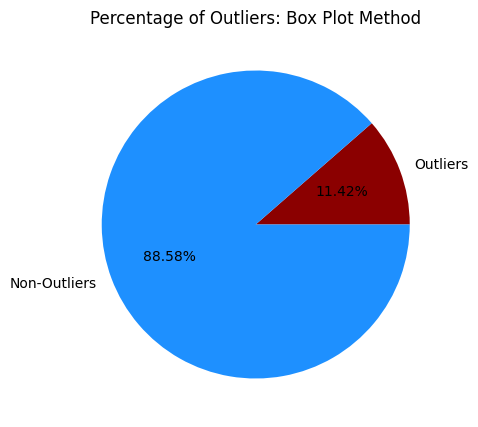

In [325]:
# plot a piechart for percentage exclusion
plt.figure(figsize=(5, 5))
plt.pie([box_plot_outliers.mean(), 1 - box_plot_outliers.mean()],
        labels=["Outliers", "Non-Outliers"],
        autopct='%1.2f%%',
        colors=[color_red, color_blue_light ])
plt.title("Percentage of Outliers: Box Plot Method")
plt.show()

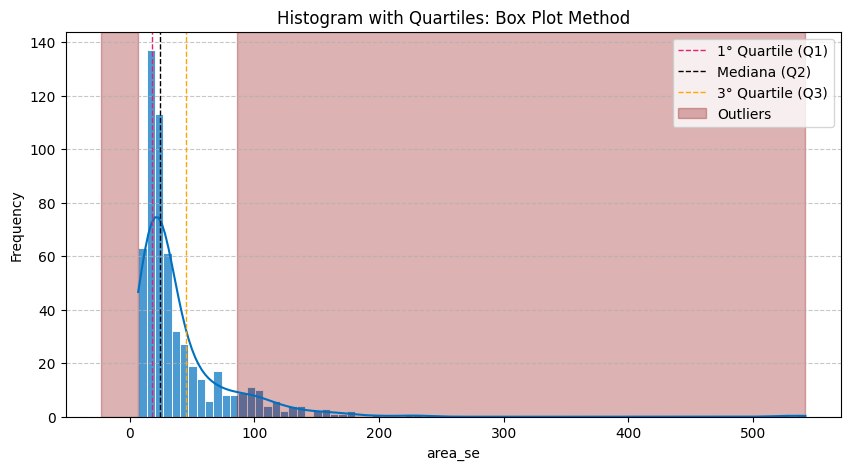

In [326]:
plt.figure(figsize=(10, 5))
sns.histplot(data, bins=bins, kde=True, color=color_black_vivid, edgecolor="white", alpha=0.7)

# Add lines for the quartiles
plt.axvline(q1, color=color_pink, linestyle="dashed", linewidth=1, label="1° Quartile (Q1)")
plt.axvline(q2, color=color_black, linestyle="dashed", linewidth=1, label="Mediana (Q2)")
plt.axvline(q3, color=color_orange, linestyle="dashed", linewidth=1, label="3° Quartile (Q3)")

# Color the area beyond the computed thresholds
plt.axvspan(upper_bound, data.max(), color=color_red, alpha=0.3, label="Outliers")
plt.axvspan(data.min(), lower_bound, color=color_red, alpha=0.3)

# Add labels and title
plt.xlabel(col_to_analyze)
plt.ylabel("Frequency")
plt.title("Histogram with Quartiles: Box Plot Method")
plt.legend(loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

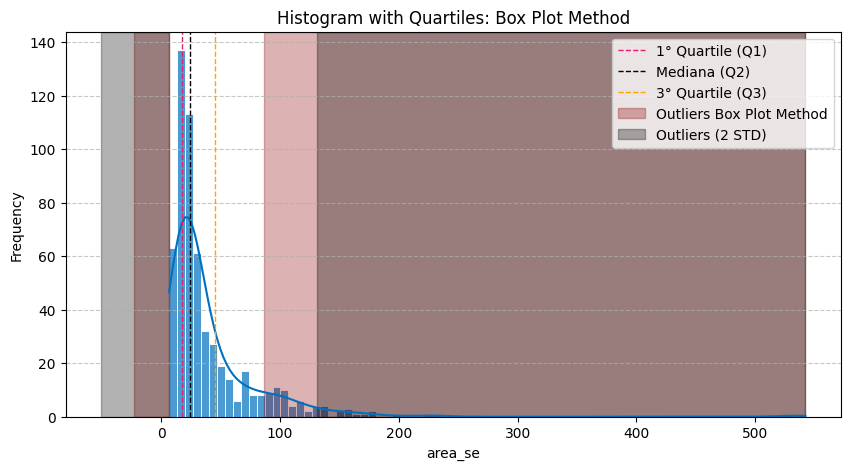

In [327]:
plt.figure(figsize=(10, 5))
sns.histplot(data, bins=bins, kde=True, color=color_black_vivid, edgecolor="white", alpha=0.7)

# Add lines for the quartiles
plt.axvline(q1, color=color_pink, linestyle="dashed", linewidth=1, label="1° Quartile (Q1)")
plt.axvline(q2, color=color_black, linestyle="dashed", linewidth=1, label="Mediana (Q2)")
plt.axvline(q3, color=color_orange, linestyle="dashed", linewidth=1, label="3° Quartile (Q3)")

# Color the area beyond the computed by box plot thresholds
plt.axvspan(upper_bound, data.max(), color=color_red, alpha=0.3, label="Outliers Box Plot Method")
plt.axvspan(data.min(), lower_bound, color=color_red, alpha=0.3)

# Color the area beyond the computed by standard deviation thresholds
plt.axvspan(computed_threshold_right, data.max(), color=color_black, alpha=0.3, label=outliers_label)
plt.axvspan(data.min(), computed_threshold_left, color=color_black, alpha=0.3)


# Add labels and title
plt.xlabel(col_to_analyze)
plt.ylabel("Frequency")
plt.title("Histogram with Quartiles: Box Plot Method")
plt.legend(loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

ISOLATION FOREST

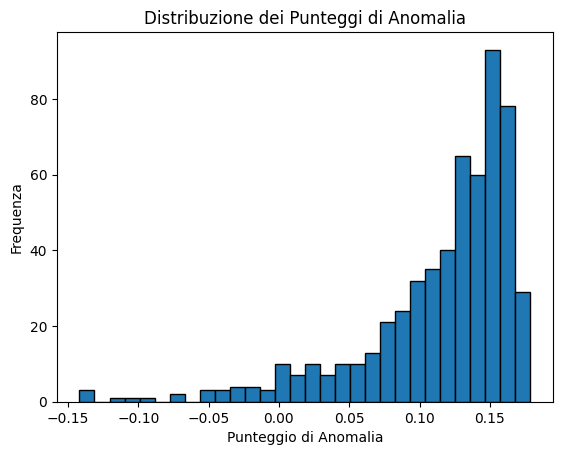

In [328]:
from sklearn.ensemble import IsolationForest

# Inizializziamo il modello con contamination fissato
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(X)

# Predizione: -1 = anomalia, 1 = normale
y_pred = model.predict(X)

model_auto = IsolationForest(contamination="auto", random_state=42)
model_auto.fit(X)

# Predizione
y_pred_auto = model_auto.predict(X)


import numpy as np

# Calcoliamo i punteggi di anomalia (valori negativi indicano outlier)
scores = model.decision_function(X)

# Visualizziamo la distribuzione dei punteggi
import matplotlib.pyplot as plt
plt.hist(scores, bins=30, edgecolor='black')
plt.xlabel("Punteggio di Anomalia")
plt.ylabel("Frequenza")
plt.title("Distribuzione dei Punteggi di Anomalia")
plt.show()

# Scegliamo una soglia basata su percentili
threshold = np.percentile(scores, 5)  # Soglia basata sul 5° percentile
anomalies = X[scores < threshold]

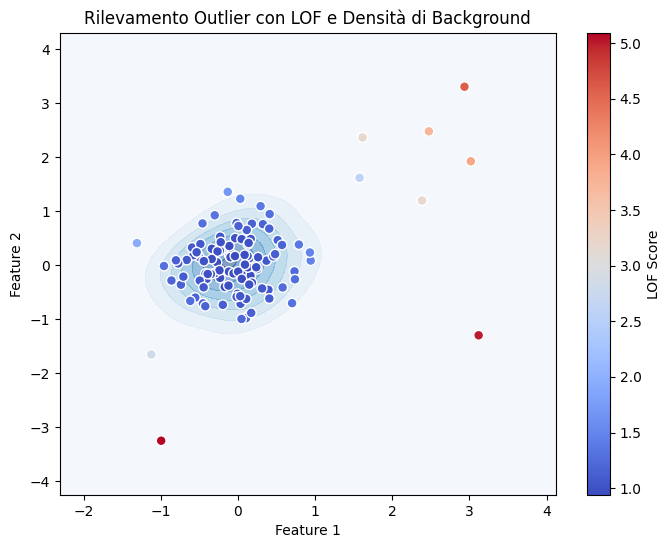

In [329]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import gaussian_kde

# Generazione di dati con alcuni outlier
np.random.seed(42)
X_inlier = 0.5 * np.random.randn(100, 2)
X_outlier = np.random.uniform(low=-4, high=4, size=(10, 2))
X = np.vstack((X_inlier, X_outlier))

# Applicazione del Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X)
lof_scores = -lof.negative_outlier_factor_

# Calcolo della densità dei punti per lo sfondo
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
xy_sample = np.vstack([xx.ravel(), yy.ravel()]).T

# Stima della densità con Kernel Density Estimation (KDE)
kde = gaussian_kde(X.T)
density = kde(np.vstack([xx.ravel(), yy.ravel()]))
density = density.reshape(xx.shape)

# Creazione del grafico
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, density, cmap="Blues", alpha=0.5)  # Sfondo con densità
plt.scatter(X[:, 0], X[:, 1], c=lof_scores, cmap="coolwarm", edgecolors="white", s=50)
plt.colorbar(label="LOF Score")
plt.title("Rilevamento Outlier con LOF e Densità di Background")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
